Name: Riekert Holder 
<br>
Student Number: 2517888

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn minisom

     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 37.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=07a14278ebda7412d6f86a2c26635408def09c968114245282083e8f98c29fb4
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=dbdc0d1d818c23191ee441e0fdce942388f0fd1127886ce6eb715719e93b670e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=c9e4dea7b977194e21e65b0fad09119daf645f14f78d0b42402758bd826d559b
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built umap-learn pynndescent minisom


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from datetime import datetime
from sklearn.feature_selection import mutual_info_classif, f_classif

## 2.1 Exploration

### 2.1.1 Describe the Dataset

In [ ]:
########################### READING DATA ###################################

########################### TRAIN DATA #####################################
#read the dataset and seperate data with delim_whitespace
X_train = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/train/X_train.txt', delim_whitespace=True, header=None)
#get the features from features.txt
feats = [] 
with open('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/features.txt') as file:
    feats = [line.split()[1] for line in file.readlines()]
#add features 
X_train.columns = [feats]
#add subject data
X_train['subject'] = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/train/subject_train.txt', header=None, squeeze=True)
#get y values and create y_train
y_train = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
#combine X and Y datasets to make overall training set
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.to_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/train.csv', index=False)
train = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/train.csv')
############################################################################


########################### TEST DATA ######################################
#read the dataset and seperate data with delim_whitespace
X_test = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [feats]
#add subject data
X_test['subject'] = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/test/subject_test.txt', header=None, squeeze=True)

#get y values and create y_train
y_test = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

#combine X and Y datasets to make overall training set
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

test.to_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/test.csv', index=False)
test = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/test.csv')


In [ ]:
train.shape, test.shape

((7352, 564), (2947, 564))

In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.286081,0.216289,0.

In [ ]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,-0.303028,-0.574975,0.529679,0.394903,0.607122,-0.563359,-0.838978,-0.904777,-0.876810,-0.701179,-0.642868,-0.664678,-0.093694,-0.105883,-0.142690,-0.124831,0.123073,-0.030495,0.100853,-0.038277,0.045200,0.143128,-0.014339,-0.002145,0.048802,0.029028,-0.092721,-0.108279,-0.207585,0.095198,...,-0.315550,-0.877314,0.160807,-0.262749,-0.567276,-0.707893,-0.717690,-0.696441,-0.754527,-0.897678,-0.707893,-0.898787,-0.727937,-0.047341,-0.880905,-0.029208,-0.290799,-0.601914,-0.780744,-0.791688,-0.774820,-0.806254,-0.869391,-0.780744,-0.943172,-0.775752,-0.248673,-0.902963,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,0.274075,0.253431,0.338503,0.326645,0.271650,0.434127,0.211957,0.125120,0.157134,0.325979,0.362060,0.331992,0.445319,0.423831,0.359451,0.310705,0.247947,0.257935,0.235618,0.246854,0.209876,0.207973,0.217290,0.270411,0.212999,0

**TRAIN DATA: <br>Our dataset has 7352 entries and 564 columns of data.The last 3 columns contain data regarding who the person is and the activities that were picked up.<br>Since we have 564 columns of data it will take alot of typing to show the range in each feature and their mean's so the above output will be sufficient enough<br>The min of all features are similar, which is -1.0 or in a range between -0.9 -> -1.0 and the maximums range from 0.9 - > 1.0<br>The mean activity is 3.64 -> 4.0 which is sitting**<br><br>
**TEST DATA:<br>**
**The Test data has 2947 rows and 564 columns of data.The last 3 columns contain data regarding who the person is and the activities that were picked up.The ranges stated above of the train data is the same as the test data**

### 2.1.2 Missing values or Duplicates

In [ ]:
miss_vals = train.isna().sum().sum()
print(f"We have {miss_vals} missing values in our training dataset")

We have 0 missing values in our training dataset


In [ ]:
dup_vals = train.duplicated().sum()
print(f"We have {dup_vals} duplicates in our training dataset")

We have 0 duplicates in our training dataset


**We have no missing values or duplicates in our training dataset**

### 2.1.3 Class and user visualizations

**Since nothing was said whether we need to only explore the train or test data,I will assume we need to concatenate the data and explore it as one dataset**

In [ ]:
both_df = pd.concat([train, test], axis=0).reset_index(drop=True)

**How many of each class:**

([<matplotlib.patches.Wedge at 0x7ff85e335f10>,
 [Text(0.912197696055357, 0.6147319442743304, 'LAYING'),
  Text(-0.21486667196758633, 1.0788106012074472, 'SITTING'),
  Text(-1.065601489034256, 0.2729349126952738, 'STANDING'),
  Text(-0.7531828672782088, -0.8016954337144352, 'WALKING'),
  Text(0.2636606321506688, -1.0679340199908935, 'WALKING_DOWNSTAIRS'),
  Text(1.000373282280183, -0.4574421232243195, 'WALKING_UPSTAIRS')],
 [Text(0.49756237966655836, 0.3353083332405438, '18.9'),
  Text(-0.1172000028914107, 0.5884421461131529, '18.5'),
  Text(-0.5812371758368668, 0.1488735887428766, '17.3'),
  Text(-0.41082701851538656, -0.43728841838969185, '16.7'),
  Text(0.14381489026400116, -0.5825094654495782, '15.0'),
  Text(0.5456581539710088, -0.24951388539508332, '13.7')])

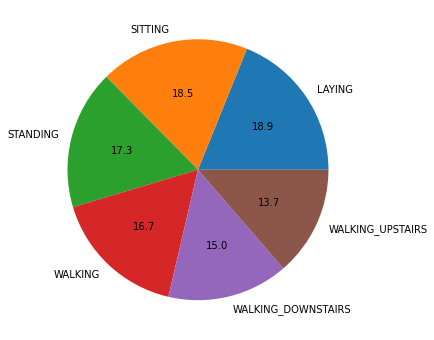

In [ ]:
plt.figure(figsize=(14,6))
plt.pie(np.array(both_df.iloc[:,-1].value_counts()),labels=sorted(both_df.iloc[:,-1].unique()), autopct = '%0.1f')

**Most participants in the study were laying, sitting and standing**<br>
**The ranking for the top 3 most activities are:**<br>
1.   Laying - 18.9%
2.   Sitting - 18.5%
3.   Standing - 17.3%

**How many for each user**

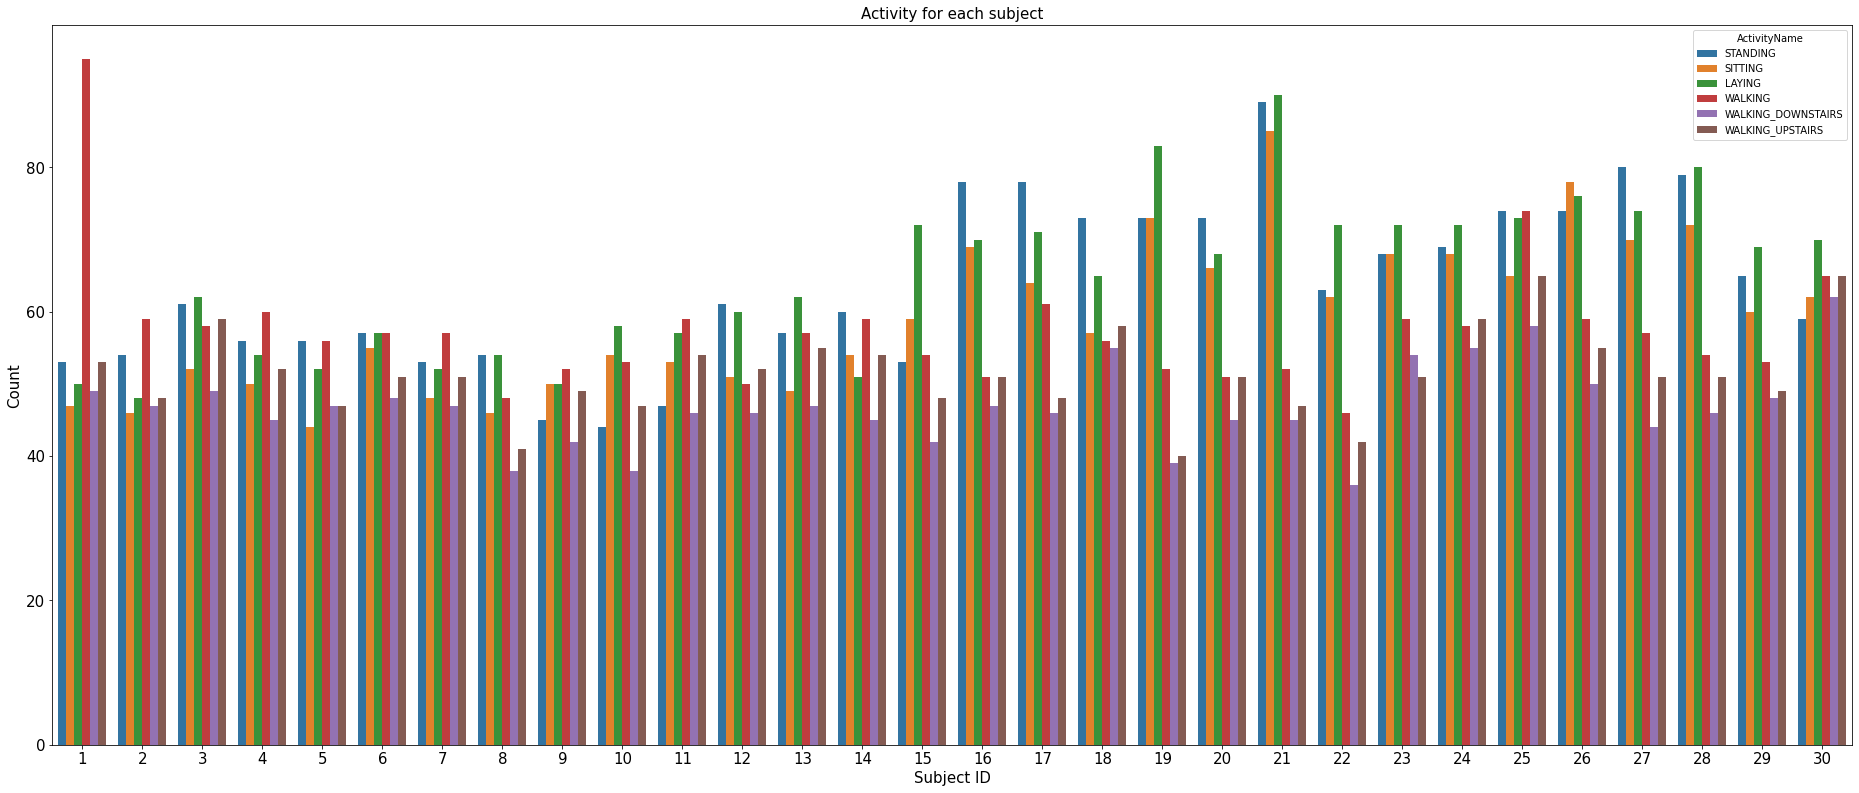

In [ ]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity for each subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = "ActivityName", data = both_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

**From the barplot above we can see the counts of the activities done by each subject.**

### 2.1.4 Accelerometer readings for all classes

(10299, 5)


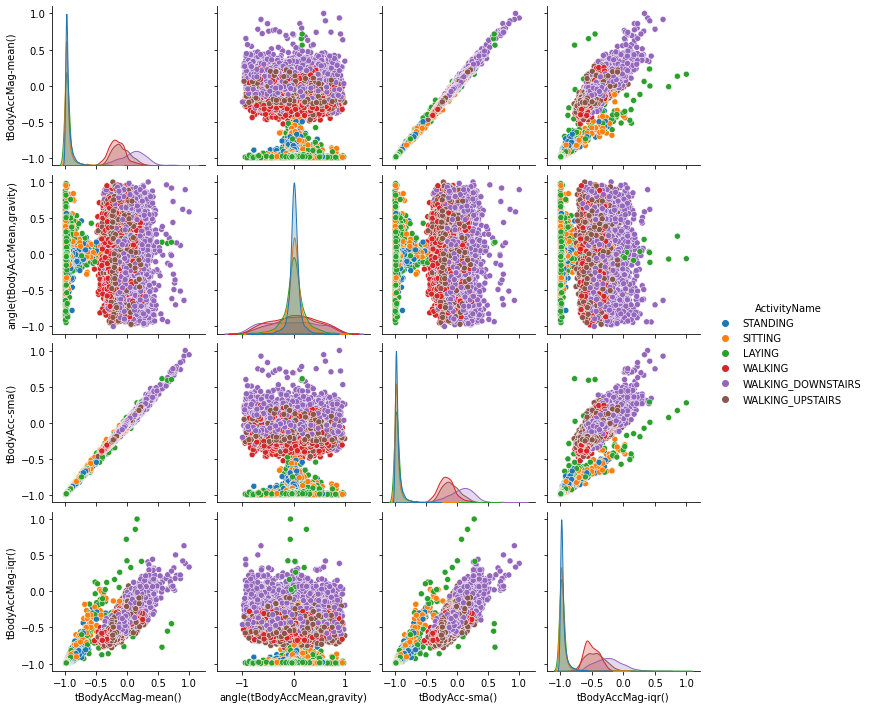

In [ ]:
features = ['tBodyAccMag-mean()','ActivityName','angle(tBodyAccMean,gravity)','tBodyAcc-sma()','tBodyAccMag-iqr()']
subset = both_df[features]
print(subset.shape)
sns.pairplot(subset, hue='ActivityName')

**After testing some of the features, we found that the tBodyAccMag-mean() feature shows clear seperation between the accelorometer readings of the classes.The features tBodyAcc-sma() and tBodyAccMag-iqr() could also be used to show this seperation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

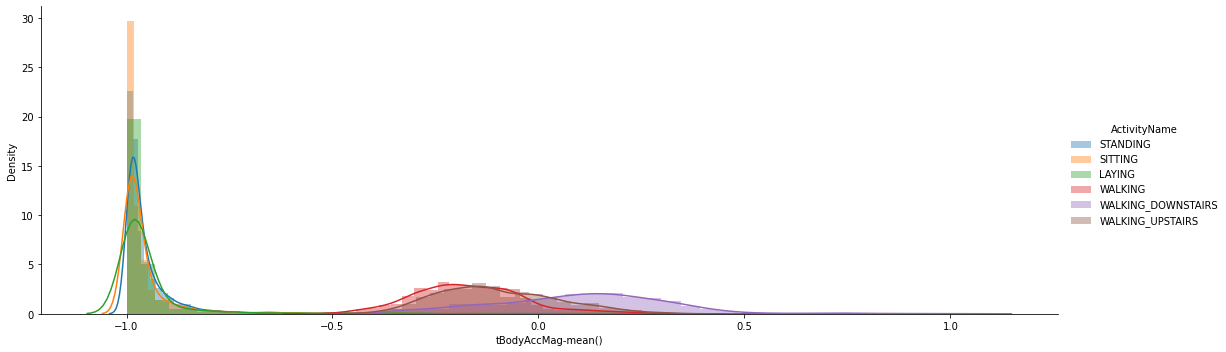

In [ ]:
 g=sns.FacetGrid(both_df,hue='ActivityName',height=5,aspect=3)
g.map(sns.distplot,'tBodyAccMag-mean()').add_legend()

**Above is a plot that shows a clear static/dynamic separation, our dynamic accelerometer reading are on the left side of the plot and our static ones on the right hand side.When participants are moving the data is normally distributed with some long tail.**

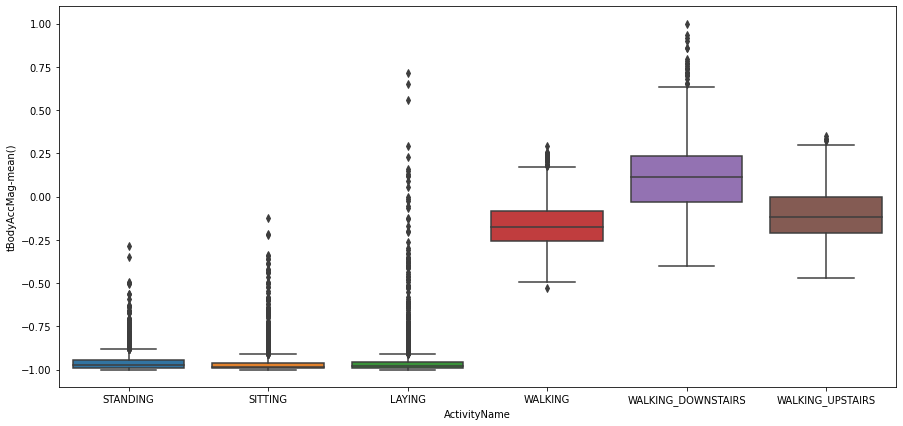

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='ActivityName',y='tBodyAccMag-mean()',data=both_df)

**Our boxplots also show a seperation between our dynamic and static data.Our dynamic data has a much higher BodyAccMag-mean() than the static data,and this is true since dynamic movements have a higher Body acceleration Mag.<br>Our static categories also has more outliers than the dynamic categories**

<br>



### 2.1.5 Rule(if/else)



*   **If BodyACCMean < -0.75 then the activities are Standing, sitting or laying down**
*   **If BodyACCMean > 0.60 then the activities are either Walking_Upstairs, Walking_Downstairs or Walking**
*   **If BodyACCMean > 0 then the activity is Walking_Downstairs**


**incorrect classification can occur if we classify activities like this, beacuse we do have outliers**

### 2.1.6 Exploit Laying down class

**One of the only ways i can think of that could exploit laying down to have more movement is with angles.So i will plot multiple barplots with angle data**

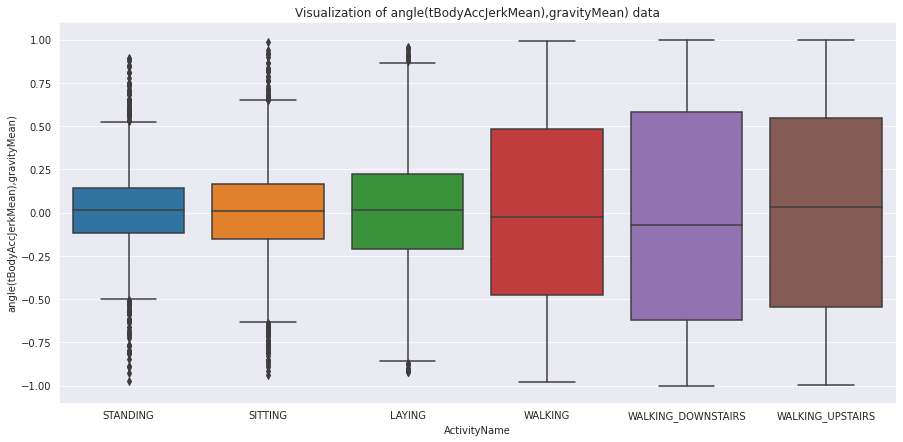

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Visualization of angle(tBodyAccJerkMean),gravityMean) data")
sns.boxplot(x='ActivityName',y='angle(tBodyAccJerkMean),gravityMean)',data=both_df)

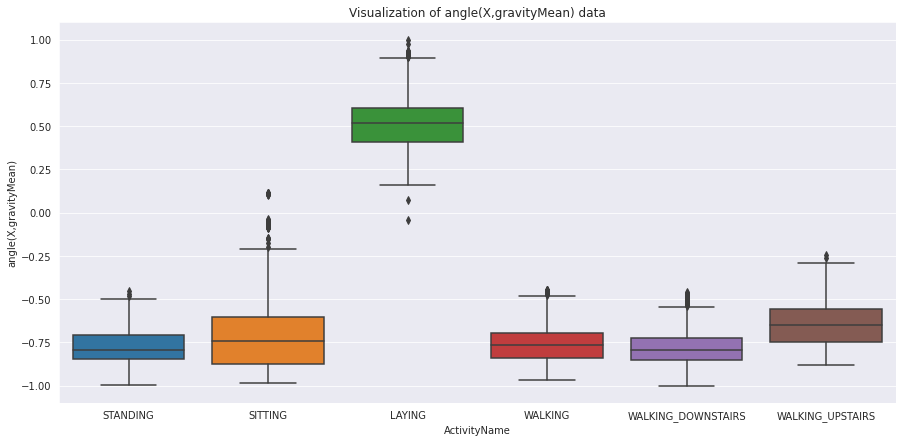

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Visualization of angle(X,gravityMean) data")
sns.boxplot(x='ActivityName',y='angle(X,gravityMean)',data=both_df)

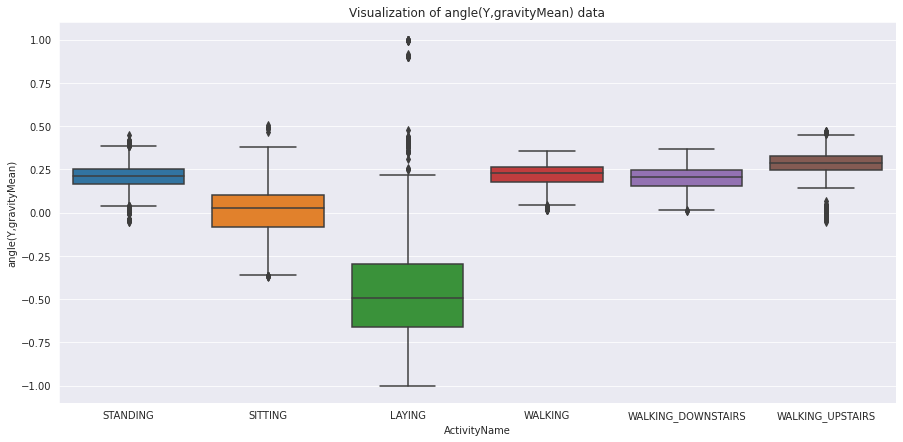

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Visualization of angle(Y,gravityMean) data")
sns.boxplot(x='ActivityName',y='angle(Y,gravityMean)',data=both_df)

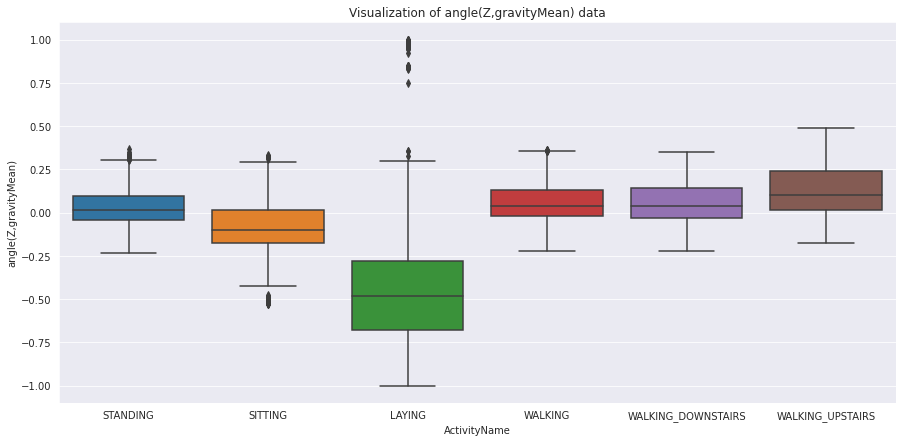

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Visualization of angle(Z,gravityMean) data")
sns.boxplot(x='ActivityName',y='angle(Z,gravityMean)',data=both_df)

**The second plotted boxplot clearly shows the exploiting, we will use this one**

### 2.1.7 Rule that effectively separates LAYING from all other classes

**We only need a if statemant<br>If angleX,gravityMean > 0 then Activity is Laying.**

### 2.1.8 t-SNE visualization

In [ ]:
df_temp = both_df.copy()

train_tSNE = df_temp.drop(['Activity','subject','ActivityName'],axis=1)
tSNE = TSNE(random_state=42, n_components=2,verbose=1,perplexity=50,n_iter=1000).fit_transform(train_tSNE)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.005s...
[t-SNE] Computed neighbors for 10299 samples in 4.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.385627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.983643
[t-SNE] KL

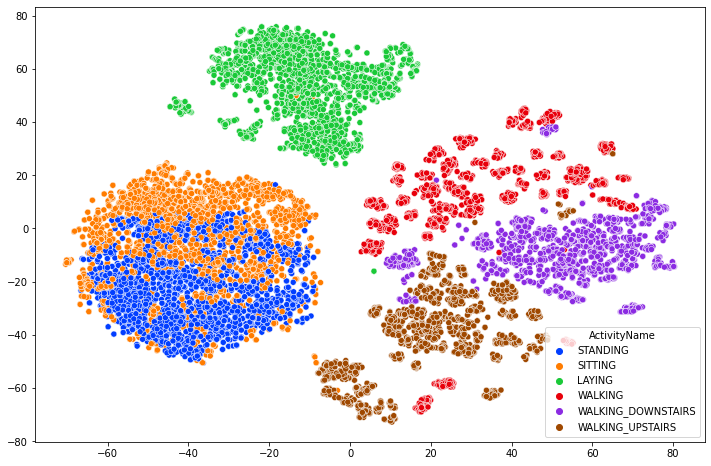

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tSNE[:,0],y=tSNE[:,1],hue=both_df['ActivityName'],palette='bright')

**Our tSNE clusters work and show clear seperation except for the activities: Standing and Sitting.All our walking activities are located in the bottom right area of the plot.All laying activities are seperated clearly from the rest**
<br>**A resaon why standing and sitting are grouped tohgether and Laying down isnt with those groups could be that the angles of sitting and standing are similar too each other, and laying down has the oppsitite angles.**
**Our model will probably be confused between standing and sitting data, but we can confidently predict our walking and laying down activities**

### 2.1.9 t-SNE with userID visualization

In [ ]:
dd = both_df.copy()
sub_data = dd.subject

label = dd.Activity
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

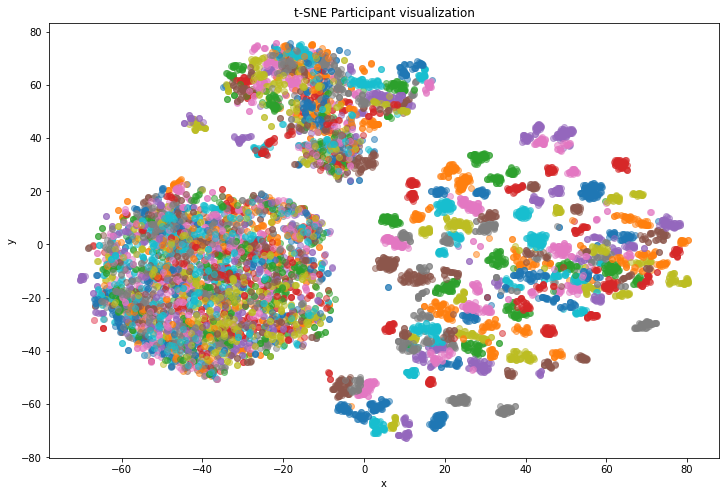

In [ ]:
plt.figure(figsize=(12,8))
plt.title("t-SNE Participant visualization")
plt.xlabel("x")
plt.ylabel("y")
for i, group in enumerate(sub_data.unique()):
    # Mask to separate sets
    mask = (sub_data==group).values
    plt.scatter(x=tSNE[mask][:,0], y=tSNE[mask][:,1], alpha=0.5, label=group)
plt.show()

**The plot above reveals every person's personal information, everybody has for example a unique walking style as seen in the bottom right area.We can detect what the participants are doing and also who is using the smartphone(only if theyre walking)**
<br>
**We can also conclude that we cant really analyze the particpants in the standing and sitting clusters and the laying cluster.But from the 3 Walking clusters we can see groups of data which are clustered according to the userID**

### 2.1.10 Investigate Walking

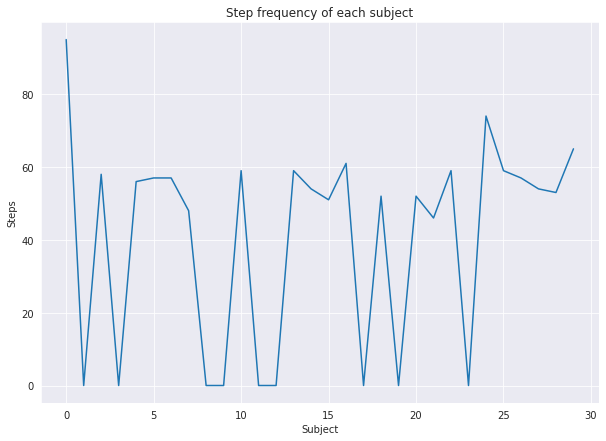

In [ ]:
steps = [0 for i in range(30)]
for i in range(7352):
    for j in range(30):
        if((both_df.Activity[i]==1) and both_df.subject[i]==j+1):
            steps[j] += 1


sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.title('Step frequency of each subject')
plt.xlabel('Subject')
plt.ylabel('Steps')
plt.plot(steps)
plt.show()

**Majority of all subjects had the same step count , with subject 1 having the most steps and subject 22 with the least amount of steps**

### 2.1.11 Difference in Walking Speed among all participants

## 2.2 Baseline Models

### 2.2.1 baseline model predictions and F1 scores

In [112]:
xTrain = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
yTrain = train.ActivityName

xTest = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
yTest = test.ActivityName

#### Random Forest Classifier

In [ ]:
def RFC_model(xTrain, yTrain, xTest, yTest):
  rf = RandomForestClassifier(random_state=42)
  train_start_time = datetime.now()
  rf.fit(xTrain, yTrain)
  train_end_time = datetime.now()
  print("Build time:", train_end_time - train_start_time)
  rf_pred = rf.predict(xTest)
  accuracy_score_rf = f1_score(yTest, rf_pred, average='micro')*100
  print("F1 Score:",accuracy_score_rf)

#### Logistic Regression

In [ ]:
def LR_model(xTrain, yTrain, xTest, yTest):
  lg = LogisticRegression(random_state=42)
  train_start_time = datetime.now()
  lg.fit(xTrain, yTrain)
  train_end_time = datetime.now()
  print("Build time:", train_end_time - train_start_time)
  lg_pred = lg.predict(xTest)
  accuracy_score_lf = f1_score(yTest, lg_pred, average='micro')*100
  print("F1 Score:",accuracy_score_lf)

#### SVC with rbf Kernel

In [126]:
def SVC_model(xTrain, yTrain, xTest, yTest):
  svc = SVC(kernel='rbf',random_state=42)
  train_start_time = datetime.now()
  svc.fit(xTrain,yTrain)
  train_end_time = datetime.now()
  print("Build time:", train_end_time - train_start_time)
  svc_pred = svc.predict(xTest)
  accuracy_score_svc = f1_score(yTest, svc_pred, average='micro')*100
  print("F1 Score:",accuracy_score_svc) 

#### Run all Models

In [128]:
def run_models(xTrain, yTrain, xTest, yTest):
  print("RANDOM FOREST CLASSIFIER")
  print("======================================")
  RFC_model(xTrain, yTrain, xTest, yTest)
  print("======================================\n\n")

  print("LOGISTIC REGRESSION")
  print("======================================")
  LR_model(xTrain, yTrain, xTest, yTest)
  print("======================================\n\n")

  print("SVC")
  print("======================================")
  SVC_model(xTrain, yTrain, xTest, yTest)
  print("======================================\n\n")

run_models(xTrain, yTrain, xTest, yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:12.871466
F1 Score: 92.60264675941634


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:03.577227
F1 Score: 95.89412962334578


SVC
Build time: 0:00:02.008686
F1 Score: 95.04580929759076




**Findings:**<br>
**RFC -> F1 Score: 92.6 ; Build Time: 12ms**<br>
**LR -> F1 Score: 95.9 ; Build Time: 3ms**<br>
**SVC -> F1 Score: 95 ; Build Time: 1ms**<br>
**Our SVC model did the best in terms of the build time, and Logistic Regression(LR) got the highest F1 score**

### 2.2.2 predict WALKING class

In [162]:
train_2 = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/train.csv')
test_2 = pd.read_csv('/content/drive/MyDrive/IDVE_Exam/UCI DATASET/test.csv')

train2 = train_2[train_2["ActivityName"] == "WALKING"]
test2 = test_2[test_2["ActivityName"] == "WALKING"]


In [163]:
train2

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
78,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,-0.154731,-0.203759,-0.130752,0.112070,0.156691,0.411377,-0.215441,-0.773065,-0.854762,-0.702023,-0.545276,-0.491518,-0.341297,0.423706,0.286351,-0.032007,-0.591174,0.683984,-0.557770,0.348689,-0.332824,0.347254,0.021749,-0.037176,-0.359138,0.296990,-0.157619,-0.074607,-0.124846,-0.009271,0.247025,...,-0.904762,0.054482,-0.220105,-0.632717,-0.222176,-0.273650,-0.214599,-0.459973,-0.451367,-0.222176,-0.652304,-0.431614,0.617900,-0.846154,-0.000470,-0.461130,-0.816101,-0.431832,-0.476370,-0.386561,-0.545895,-0.785456,-0.431832,-0.838400,-0.326649,0.538309,-0.904762,-0.151642,-0.312137,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,1,1,WALKING
79,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,-0.154731,-0.173983,-0.156627,0.112070,0.122743,0.411377,-0.122736,-0.701589,-0.796130,-0.751736,-0.277678,-0.212592,-0.386870,0.345317,0.264955,0.101277,-0.540624,0.569795,-0.369516,0.171045,-0.272080,0.315157,-0.018700,0.085268,-0.296888,0.320300,-0.204206,-0.082322,-0.212158,-0.060091,0.239351,...,-0.873016,0.190479,-0.143708,-0.528426,-0.268280,-0.314623,-0.309958,-0.429069,-0.822997,-0.268280,-0.691079,-0.309316,0.582987,-0.794872,0.130224,-0.243455,-0.624929,-0.428186,-0.492884,-0.452924,-0.529218,-0.417775,-0.428186,-0.841159,-0.468123,0.471655,-0.873016,0.173709,-0.176625,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,1,1,WALKING
80,0.254867,0.003815,-0.123658,-0.275158,0.013080,-0.284371,-0.341341,-0.026013,-0.320272,-0.175559,-0.156809,-0.156627,0.213171,0.122743,0.448288,-0.161978,-0.735901,-0.800721,-0.767175,-0.434536,-0.397488,-0.528745,0.308494,0.483254,-0.035913,-0.358261,0.377804,-0.288019,0.236873,-0.227292,0.294144,-0.056332,0.170810,-0.140111,0.142358,0.037695,-0.275925,-0.187704,-0.079968,0.280470,...,-0.873016,0.310757,-0.365960,-0.710175,-0.308671,-0.401400,-0.396666,-0.387935,-0.705972,-0.308671,-0.746932,-0.476322,0.643204,-0.794872,0.200415,-0.189093,-0.500953,-0.

In [164]:
yTrain_2 = train2.subject
xTrain_2 = train2.drop(['subject', 'ActivityName'], axis=1)

yTest_2 = test2.subject
xTest_2 = test2.drop(['subject','ActivityName'], axis=1)


In [165]:
xTest_2.shape,yTest_2.shape

((496, 562), (496,))

In [166]:
 xTrain_2.shape , yTrain_2.shape

((1226, 562), (1226,))

#### Random Forest Classifier

In [167]:
xTrain_2

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
78,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,-0.154731,-0.203759,-0.130752,0.112070,0.156691,0.411377,-0.215441,-0.773065,-0.854762,-0.702023,-0.545276,-0.491518,-0.341297,0.423706,0.286351,-0.032007,-0.591174,0.683984,-0.557770,0.348689,-0.332824,0.347254,0.021749,-0.037176,-0.359138,0.296990,-0.157619,-0.074607,-0.124846,-0.009271,0.247025,...,-0.173641,0.484926,-0.904762,0.054482,-0.220105,-0.632717,-0.222176,-0.273650,-0.214599,-0.459973,-0.451367,-0.222176,-0.652304,-0.431614,0.617900,-0.846154,-0.000470,-0.461130,-0.816101,-0.431832,-0.476370,-0.386561,-0.545895,-0.785456,-0.431832,-0.838400,-0.326649,0.538309,-0.904762,-0.151642,-0.312137,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,1
79,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,-0.154731,-0.173983,-0.156627,0.112070,0.122743,0.411377,-0.122736,-0.701589,-0.796130,-0.751736,-0.277678,-0.212592,-0.386870,0.345317,0.264955,0.101277,-0.540624,0.569795,-0.369516,0.171045,-0.272080,0.315157,-0.018700,0.085268,-0.296888,0.320300,-0.204206,-0.082322,-0.212158,-0.060091,0.239351,...,-0.230524,0.438225,-0.873016,0.190479,-0.143708,-0.528426,-0.268280,-0.314623,-0.309958,-0.429069,-0.822997,-0.268280,-0.691079,-0.309316,0.582987,-0.794872,0.130224,-0.243455,-0.624929,-0.428186,-0.492884,-0.452924,-0.529218,-0.417775,-0.428186,-0.841159,-0.468123,0.471655,-0.873016,0.173709,-0.176625,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,1
80,0.254867,0.003815,-0.123658,-0.275158,0.013080,-0.284371,-0.341341,-0.026013,-0.320272,-0.175559,-0.156809,-0.156627,0.213171,0.122743,0.448288,-0.161978,-0.735901,-0.800721,-0.767175,-0.434536,-0.397488,-0.528745,0.308494,0.483254,-0.035913,-0.358261,0.377804,-0.288019,0.236873,-0.227292,0.294144,-0.056332,0.170810,-0.140111,0.142358,0.037695,-0.275925,-0.187704,-0.079968,0.280470,...,-0.324642,0.441372,-0.873016,0.310757,-0.365960,-0.710175,-0.308671,-0.401400,-0.396666,-0.387935,-0.705972,-0.308671

In [169]:
run_models(xTrain_2, yTrain_2, xTest_2, yTest_2)

RANDOM FOREST CLASSIFIER
Build time: 0:00:02.078775
F1 Score: 0.0


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:01.600541
F1 Score: 0.0


SVC
Build time: 0:00:00.271260
F1 Score: 0.0




## 2.3 Feature Selection

### 2.3.1 Mutual information selection

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel, SelectKBest


#prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def select_features(X_train, y_train, X_test, kn):
    # configure to select 10 features
    fs = SelectKBest(score_func=mutual_info_classif, k=kn)
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [118]:
def getFeats(xTrain, xTest, yTrain, yTest, kn):
  y_train_enc, y_test_enc = prepare_targets(yTrain, yTest)
  _, _, fs = select_features(xTrain, y_train_enc, xTest, kn)
  # print(fs.get_support())
  chosen_feats = pd.DataFrame({ "Features": pd.DataFrame(xTrain).columns, 
                         "Importances": fs.scores_, "Included": fs.get_support()})
  chosen_feats.set_index('Importances')
  # sort in ascending order to better visualization.
  chosen_feats = chosen_feats[chosen_feats.Included == True].sort_values('Importances')
  # what are scores for the feature
  for _, row in chosen_feats.iterrows():
    print('Feature %s: %f' % (row['Features'], row['Importances']))
  feats = chosen_feats.iloc[:,0]
  feats = np.array(feats)
  newXtrain = xTrain[feats]
  newXtest = xTest[feats]
  return newXtrain, newXtest

#### 5 Features

In [119]:
newXtrain, newXtest= getFeats(xTrain, xTest, yTrain, yTest, 5)

Feature tGravityAccMag-max(): 0.904660
Feature tGravityAcc-max()-Y: 0.928346
Feature tBodyAccJerk-max()-X: 0.937891
Feature tGravityAcc-min()-Y: 0.944264
Feature tBodyAcc-max()-X: 1.006971


In [130]:
run_models(newXtrain, yTrain, newXtest, yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:01.825583
F1 Score: 77.50254496097727


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:02.055965
F1 Score: 79.64031218187986


SVC
Build time: 0:00:00.620723
F1 Score: 79.91177468612148




#### 10 Features

In [131]:
newXtrain, newXtest= getFeats(xTrain, xTest, yTrain, yTest, 10)

Feature fBodyAcc-bandsEnergy()-1,8: 0.887428
Feature fBodyAcc-std()-X: 0.890934
Feature fBodyAcc-bandsEnergy()-1,16: 0.891218
Feature tBodyAccJerk-max()-Y: 0.892837
Feature tBodyAccMag-max(): 0.904660
Feature tGravityAccMag-max(): 0.904677
Feature tGravityAcc-max()-Y: 0.928346
Feature tBodyAccJerk-max()-X: 0.937809
Feature tGravityAcc-min()-Y: 0.944219
Feature tBodyAcc-max()-X: 1.006912


In [133]:
run_models(newXtrain, yTrain, newXtest, yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:01.846784
F1 Score: 77.50254496097727


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:02.181549
F1 Score: 79.64031218187986


SVC
Build time: 0:00:00.619853
F1 Score: 79.91177468612148




#### 50 Features

In [134]:
newXtrain, newXtest= getFeats(xTrain, xTest, yTrain, yTest, 50)

Feature tBodyAcc-iqr()-X: 0.816692
Feature fBodyAccMag-std(): 0.817165
Feature fBodyAccJerk-energy()-X: 0.817339
Feature tBodyAccJerk-std()-X: 0.818769
Feature fBodyAccJerk-bandsEnergy()-1,24: 0.818916
Feature tGravityAcc-min()-X: 0.822990
Feature tBodyGyro-min()-Z: 0.823055
Feature tBodyAccMag-std(): 0.826947
Feature tGravityAccMag-std(): 0.826981
Feature fBodyAccMag-energy(): 0.827403
Feature fBodyAcc-entropy()-X: 0.828912
Feature tBodyAcc-min()-Y: 0.833924
Feature tBodyGyroJerk-max()-Y: 0.834010
Feature tBodyGyroJerk-min()-Y: 0.835745
Feature tBodyAccJerkMag-min(): 0.839649
Feature fBodyAccMag-mad(): 0.839825
Feature fBodyAcc-mean()-X: 0.846683
Feature tBodyGyroJerk-min()-X: 0.847122
Feature tBodyGyroJerkMag-max(): 0.847799
Feature tBodyGyroJerkMag-min(): 0.847831
Feature tBodyAccJerk-min()-Z: 0.850914
Feature fBodyAccJerk-bandsEnergy()-1,16: 0.851100
Feature tBodyGyroJerk-min()-Z: 0.854550
Feature tBodyAccJerk-min()-Y: 0.854944
Feature angle(Y,gravityMean): 0.855138
Feature tBodyGy

In [135]:
run_models(newXtrain, yTrain, newXtest, yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:03.737093
F1 Score: 85.74821852731591


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:01.274786
F1 Score: 87.64845605700712


SVC
Build time: 0:00:00.571578
F1 Score: 87.51272480488632




#### 100 Features

In [136]:
newXtrain, newXtest= getFeats(xTrain, xTest, yTrain, yTest, 100)

Feature tBodyAccJerk-sma(): 0.771934
Feature fBodyAccJerk-bandsEnergy()-9,16: 0.773844
Feature fBodyAccJerk-bandsEnergy()-1,24.1: 0.774854
Feature fBodyAccJerk-sma(): 0.775273
Feature tBodyAccJerkMag-sma(): 0.776041
Feature tBodyAccJerkMag-mean(): 0.776085
Feature tBodyGyroJerk-mad()-Z: 0.776583
Feature tBodyGyroJerk-mad()-X: 0.777748
Feature fBodyBodyAccJerkMag-mean(): 0.777820
Feature fBodyBodyAccJerkMag-max(): 0.777834
Feature fBodyBodyAccJerkMag-sma(): 0.777889
Feature fBodyBodyAccJerkMag-std(): 0.781514
Feature fBodyBodyAccJerkMag-mad(): 0.781670
Feature tGravityAccMag-sma(): 0.781832
Feature tBodyAccMag-mean(): 0.781894
Feature tGravityAccMag-mean(): 0.781894
Feature tBodyAccMag-sma(): 0.781923
Feature fBodyAccMag-iqr(): 0.782192
Feature tBodyGyro-max()-X: 0.782920
Feature fBodyAccJerk-max()-X: 0.783415
Feature tBodyAccJerkMag-energy(): 0.787081
Feature tBodyAcc-max()-Y: 0.787319
Feature fBodyAcc-sma(): 0.787826
Feature tBodyAcc-max()-Z: 0.792401
Feature fBodyBodyAccJerkMag-energ

In [137]:
run_models(newXtrain, yTrain, newXtest, yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:05.389135
F1 Score: 88.49677638276214


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:01.156796
F1 Score: 89.54869358669833


SVC
Build time: 0:00:00.706230
F1 Score: 89.71835765184933




**When we use less features our F1 score and build time both decreases**<br>
**The tradeoff for having more features gives our models a higher F1 score and higher build time, whereas a small amount of features will decrease our build time and F1 score**

### 2.3.2 Mutual information selection: WALKING

## 2.4 Feature Extraction

### 2.4.1 2D plot of the embeddings/principal components

In [ ]:
def plot2d(type, df):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Component 1', fontsize = 15)
  ax.set_ylabel('Component 2', fontsize = 15)
  ax.set_title('2 component {0}'.format(type), fontsize = 20)
  targets = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING', 'STANDING','LAYING']
  colors = ['r', 'g', 'b','c','m','y']
  for target, color in zip(targets,colors):
    indicesToKeep = df['ActivityName'] == target
    ax.scatter(df.loc[indicesToKeep, 'component 1']
               , df.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
  ax.legend(targets)
  ax.grid()

In [ ]:
xTrain.shape

(7352, 561)

#### PCA

In [ ]:
from sklearn.decomposition import PCA

def getPCA(xtrain, ytrain, xtest, ytest):
  pca = PCA(n_components=2,random_state=42)
  x_train = pca.fit_transform(xtrain)
  x_test = pca.transform(xtest)
  pcaDF_train = pd.DataFrame(data = x_train, columns = ['component 1', 'component 2'])
  PCA_vis_df = pd.concat([pcaDF_train, ytrain], axis = 1)
  plot2d("PCA", PCA_vis_df)
  return x_train, x_test, y_train, y_test


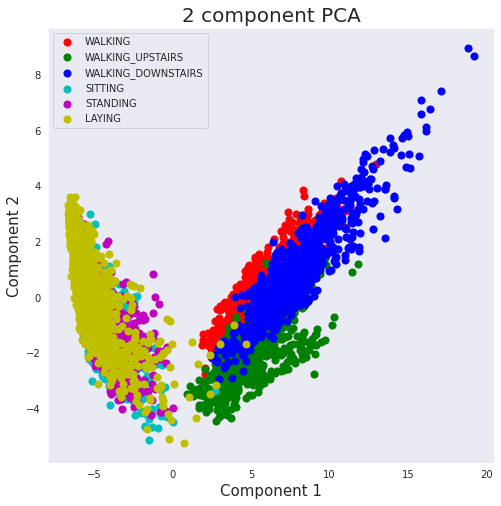

In [ ]:
pca_xTrain, pca_xTest, pca_yTrain, pca_yTest = getPCA(xTrain, yTrain, xTest, yTest)

**From the plot we can see that our model might struggle in classifying correctly because our clusters are close and on top of each other for each activity**

#### LLE

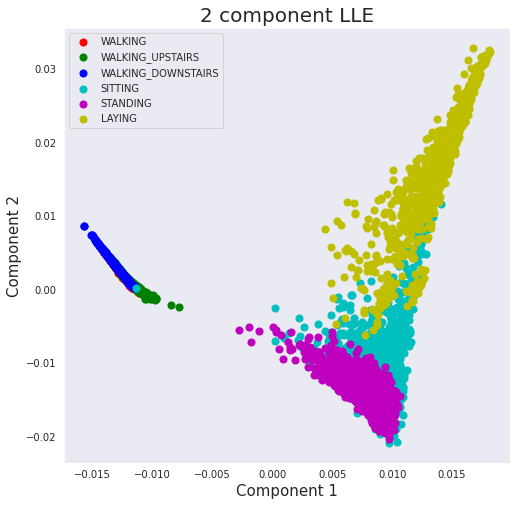

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE # for LLE dimensionality reduction

def getLLE(xtrain, ytrain, xtest, ytest):
  embed_lle = LLE(n_neighbors=65, n_components=2, method="standard")
  x_train = embed_lle.fit_transform(xtrain)
  x_test = embed_lle.transform(xtest)
  lleDF_train = pd.DataFrame(data = x_train, columns = ['component 1', 'component 2'])
  LLE_vis_df = pd.concat([lleDF_train, ytrain], axis = 1)
  plot2d("LLE", LLE_vis_df)
  return x_train, x_test, y_train, y_test

lle_xTrain, lle_xTest, lle_yTrain, lle_yTest = getLLE(xTrain, yTrain, xTest, yTest)

**The plot tells us that our models will be able to predict our static activities confidently they are well clsutered but not optimal.Our models will struggle in predicting our dynamic activities because they're clustered on top of each other**

#### ISOMAP

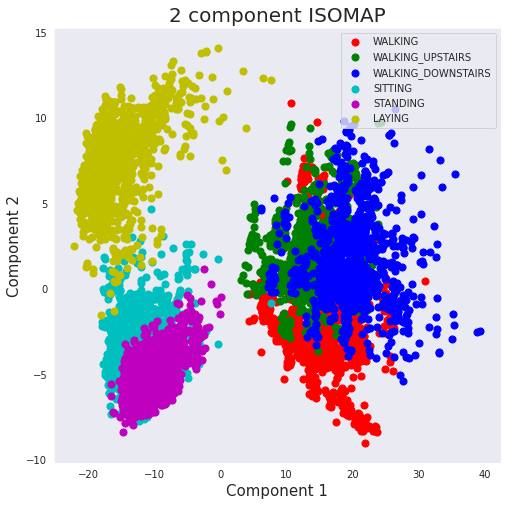

In [ ]:
from sklearn.manifold import Isomap

def getISOMAP(xtrain, ytrain, xtest, ytest):
  iso = Isomap(n_components=2, n_neighbors=45)  
  x_train = iso.fit_transform(xtrain)
  x_test = iso.transform(xtest)
  isoDF_train = pd.DataFrame(data = x_train, columns = ['component 1', 'component 2'])
  ISO_vis_df = pd.concat([isoDF_train, ytrain], axis = 1)
  plot2d("ISOMAP", ISO_vis_df)
  return x_train, x_test, y_train, y_test

iso_xTrain, iso_xTest, iso_yTrain, iso_yTest = getISOMAP(xTrain, yTrain, xTest, yTest)

**The plot tells us that our models will be able to predict our static activities confidently they are well clsutered but not optimal.Our models will struggle in predicting our dynamic activities because they're clustered on top of each other**

#### UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


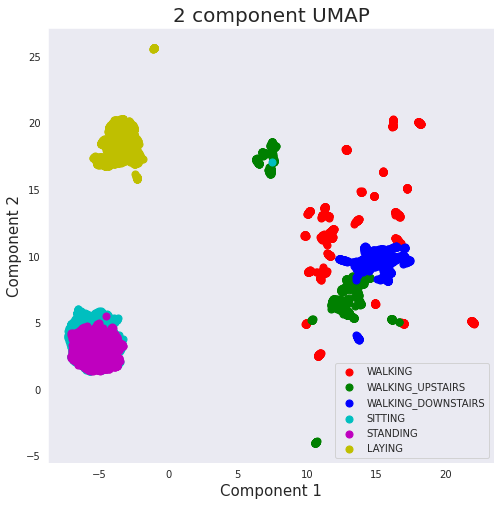

In [ ]:
 from umap import UMAP

 def getUMAP(xtrain, ytrain, xtest, ytest):
  umap_obj = UMAP(
      n_components=2, 
      metric="euclidean",
      n_neighbors=20, 
      min_dist=0.1, 
      random_state=42
      )  
  x_train = umap_obj.fit_transform(xtrain)
  x_test = umap_obj.transform(xtest)
  umapDF_train = pd.DataFrame(data = x_train, columns = ['component 1', 'component 2'])
  UMAP_vis_df = pd.concat([umapDF_train, ytrain], axis = 1)
  plot2d("UMAP", UMAP_vis_df)
  return x_train, x_test, y_train, y_test

umap_xTrain, umap_xTest, umap_yTrain, umap_yTest = getUMAP(xTrain, yTrain, xTest, yTest)

**This plot shows the most confidence out of all our feauture extraction methods, we have well seperated clsuters far away from each other , with laying and standing activities that will be our only drwback when predicting activities because they are clsutered close to each other**

### 2.4.2 Training embeddings on models

#### Models with PCA

In [ ]:
run_models(pca_xTrain, pca_yTrain, pca_xTest, pca_yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:01.252167
F1 Score: 54.90329148286393


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:00.450351
F1 Score: 58.33050559891415


SVC
Build time: 0:00:01.511016
F1 Score: 59.959280624363764




#### Models with LLE

In [ ]:
run_models(lle_xTrain, lle_yTrain, lle_xTest, lle_yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:01.387435
F1 Score: 70.71598235493722


LOGISTIC REGRESSION
Build time: 0:00:00.129042
F1 Score: 52.73159144893111


SVC
Build time: 0:00:00.778993
F1 Score: 68.17102137767222




#### Models with ISOMAP

In [ ]:
run_models(iso_xTrain, iso_yTrain, iso_xTest, iso_yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:00.917097
F1 Score: 76.00950118764844


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:00.429028
F1 Score: 77.12928401764506


SVC
Build time: 0:00:00.580673
F1 Score: 78.45266372582287




#### Models with UMAP

In [ ]:
run_models(umap_xTrain, umap_yTrain, umap_xTest, umap_yTest)

RANDOM FOREST CLASSIFIER
Build time: 0:00:00.732559
F1 Score: 85.44282321004411


LOGISTIC REGRESSION


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Build time: 0:00:00.502901
F1 Score: 71.56430268069222


SVC
Build time: 0:00:00.441893
F1 Score: 86.25721072276892




### 2.4.3 Findings  on the trade-off between training time, performance, and interpretability



1.   Interprability: All our plots show good interprebilty, we reduced more than 500+ features to only 2 features, and we could see how the different activities were clsutered , even though some were clustered on top of each other, those that were clsutered like this were from the same movement types(dynamic and static)
2.   Training time:All our training times were much faster compared to the non feature extracted feautures due to the fact that all our models had to only fit to 2 features instead of 561.Overall our logistic regression had the fastest build times no matter the feature extraction technique used.
3.   Performance: We did get lower F1 scores than if we didnt use feature extraction methods, but we still managed to get good F1 scores especially with UMAP and ISOMAP(UMAP the best)

<br>
Overall we were able to get better interpretability with feature extraction methods than if we didnt use them.We had a tradeoff in runtime , we were able to get better model building runtimes due to training with less features.Our performance wasnt as great as the models where we didnt apply feature extraction beacuase our models had less data to train on.But given the small amount of features we still were able to get good results and F1 scores.


